In [1]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

In [2]:
file_path = r"data\after_eda.csv"
df = pd.read_csv(file_path)

In [3]:
df.columns

Index(['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Licensed',
       'official_video', 'Artist_Length', 'Album_Length', 'Title_Length',
       'Description_Length'],
      dtype='object')

In [4]:
(df["Views"]<=0).sum()

0

Licensed Album_type Key i official video to wartości kategoryczne

In [5]:
df.dtypes

Album_type             object
Danceability          float64
Energy                float64
Key                   float64
Loudness              float64
Speechiness           float64
Acousticness          float64
Instrumentalness      float64
Liveness              float64
Valence               float64
Tempo                 float64
Duration_ms           float64
Views                 float64
Licensed              float64
official_video        float64
Artist_Length           int64
Album_Length            int64
Title_Length            int64
Description_Length      int64
dtype: object

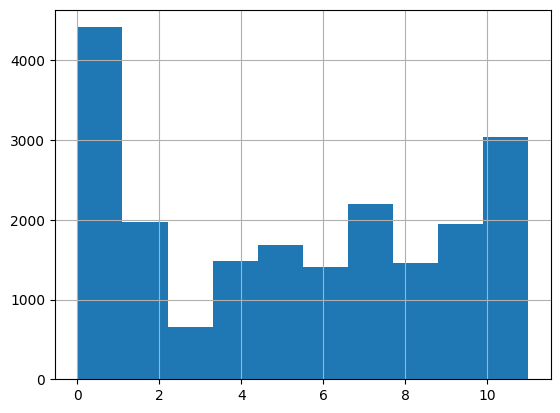

<Axes: >

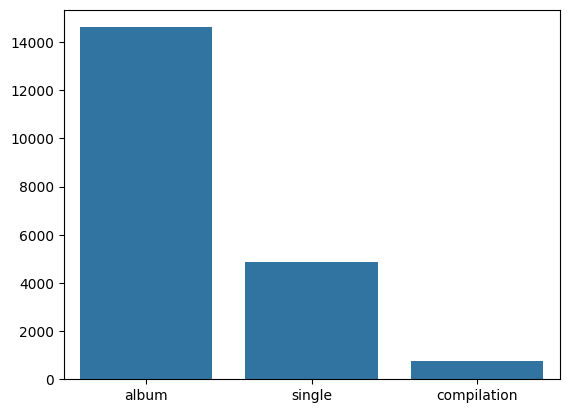

In [6]:
df["Key"].hist()
plt.show()

sns.barplot(x = Counter(df["Album_type"]).keys(), y = Counter(df["Album_type"]).values())


In [7]:
df["Key_type"] = pd.cut(df["Key"], right = False, bins = [0,5.1,11.1], labels = ["Low","High"])

key zdecydowaliśmy się podzielić na 2 kategorie

In [8]:
df = pd.get_dummies(df, columns =["Album_type"], prefix="AT")
df.drop("AT_single",axis =1, inplace = True)
df = pd.get_dummies(df, columns=["Key_type"], prefix="Key")
df.drop(["Key"], axis = 1, inplace = True)
df.drop("Key_High", axis = 1, inplace = True)

In [9]:
df.dtypes

Danceability          float64
Energy                float64
Loudness              float64
Speechiness           float64
Acousticness          float64
Instrumentalness      float64
Liveness              float64
Valence               float64
Tempo                 float64
Duration_ms           float64
Views                 float64
Licensed              float64
official_video        float64
Artist_Length           int64
Album_Length            int64
Title_Length            int64
Description_Length      int64
AT_album                 bool
AT_compilation           bool
Key_Low                  bool
dtype: object

In [10]:
df = df.astype({"AT_album":int, "AT_compilation":int,"Key_Low":int})

In [11]:
print(any(df["Album_Length"]==0))
print(any(df["Artist_Length"]==0))
print(any(df["Description_Length"]==0))
print(any(df["Title_Length"]==0))

False
False
False
False


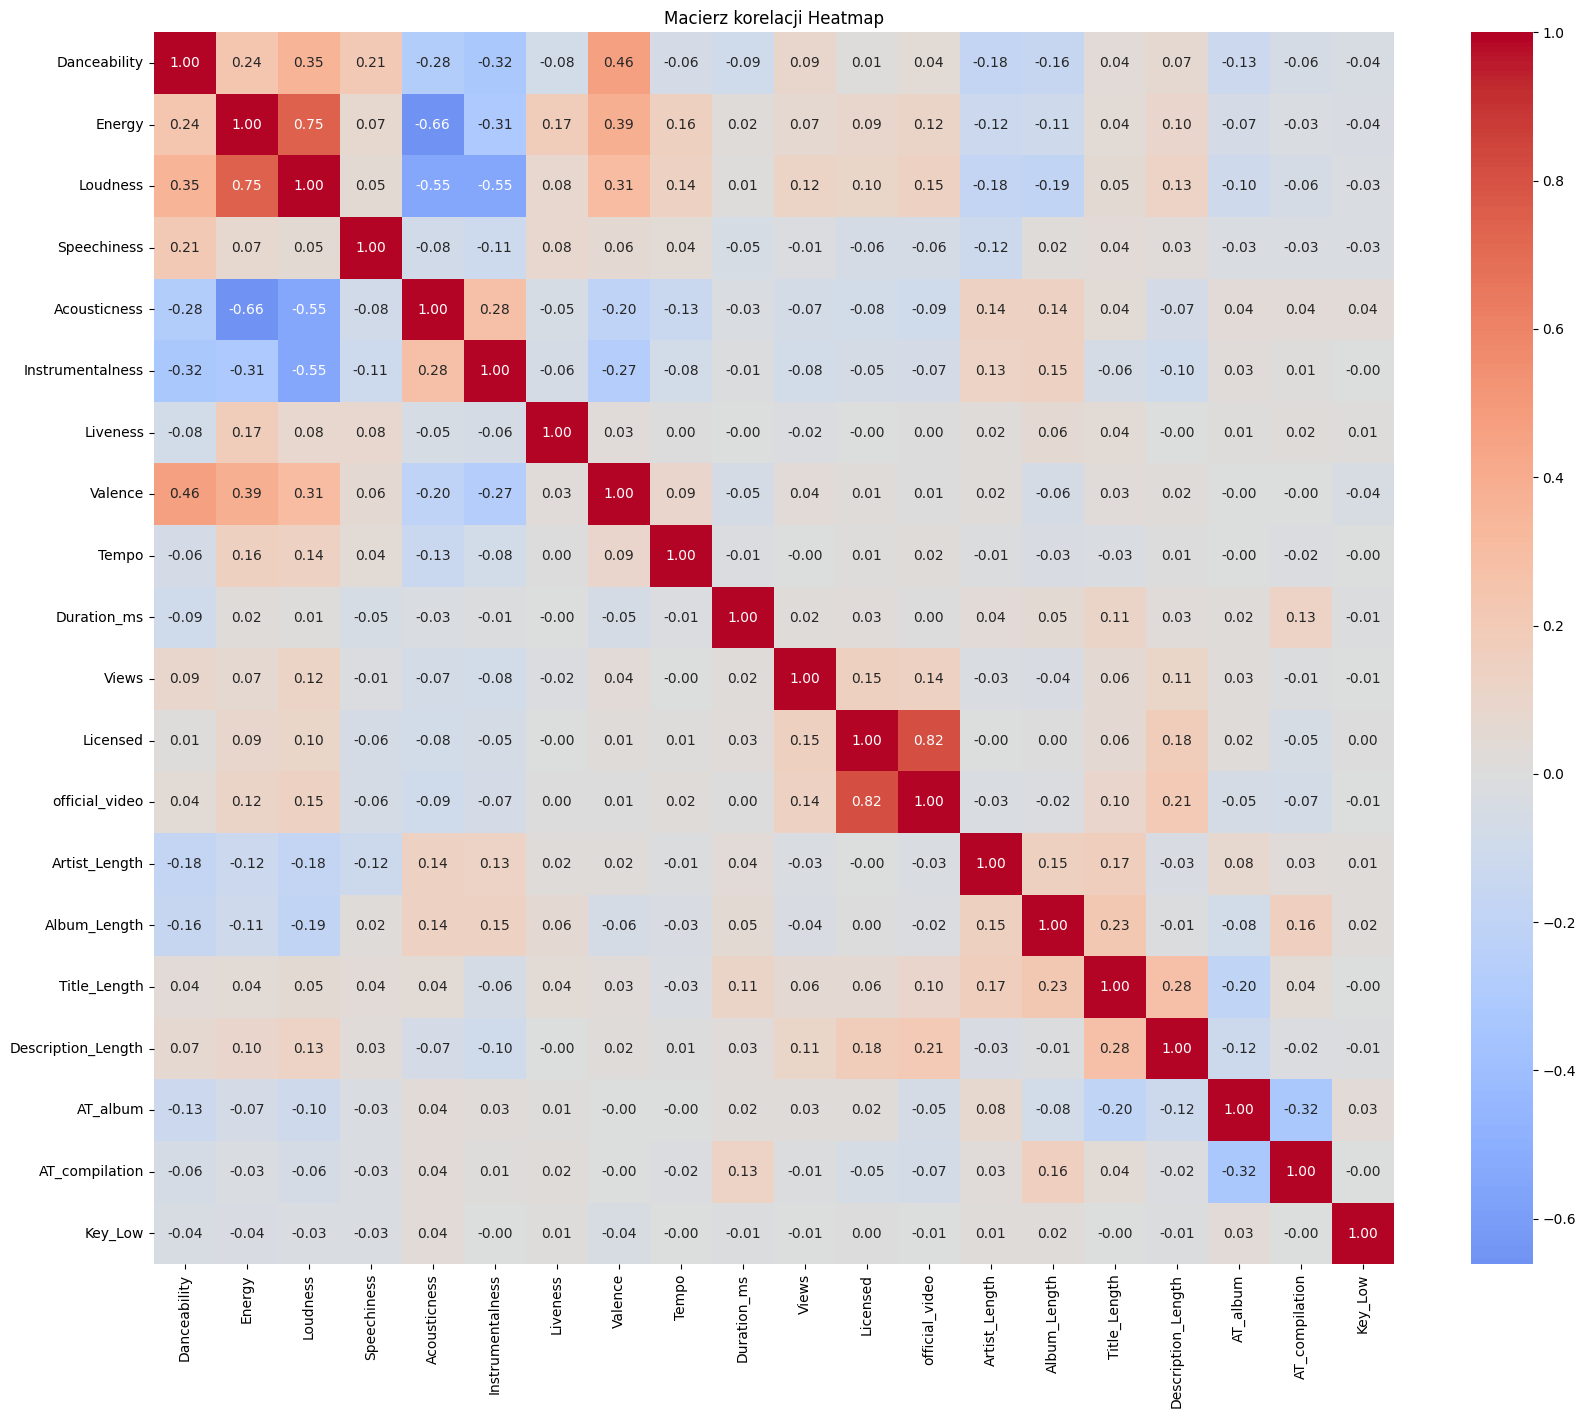

In [12]:
plt.figure(figsize=(20, 16)) 
sns.heatmap(df.select_dtypes(include=["int64","float64",'int32']).corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Macierz korelacji Heatmap")
plt.show()

In [13]:
features = df.drop(["Views"],axis=1)
X = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(ascending=False,by="VIF")

,feature,VIF
0,const,139.943727
2,Energy,3.462132
3,Loudness,3.283102
12,official_video,3.140323
11,Licensed,3.064530
5,Acousticness,1.935438
1,Danceability,1.686806
8,Valence,1.575768
6,Instrumentalness,1.569564
15,Title_Length,1.256153


na podstawie przypuszczeć z EDA, VIF i korelacji z każdej z par (Licensed, Official_video), (Energy, Loudness) wyrzucimy 1 Feature <br>
Loudness zostawiamy z racji na wyższy współczynnik korelacji z przewidywanym Views, przy niższym vif.<br>
Licensed zostawiamy z uwagi na to że offical_video ma wyższy vif generalnie wyższe współczynniki korealcji featurami innymi niż Views, a z samym Views ma niższy.

In [14]:
df.drop(["Energy","official_video"],inplace = True,axis =1)
features = df.drop(["Views"],axis=1)
X = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(ascending=False,by="VIF")

,feature,VIF
0,const,81.205830
2,Loudness,2.083772
1,Danceability,1.621723
5,Instrumentalness,1.502075
4,Acousticness,1.488572
7,Valence,1.389287
13,Title_Length,1.250820
15,AT_album,1.233824
16,AT_compilation,1.184476
12,Album_Length,1.157798


[[<Axes: title={'center': 'Danceability'}>
  <Axes: title={'center': 'Loudness'}>
  <Axes: title={'center': 'Speechiness'}>
  <Axes: title={'center': 'Acousticness'}>]
 [<Axes: title={'center': 'Instrumentalness'}>
  <Axes: title={'center': 'Liveness'}>
  <Axes: title={'center': 'Valence'}> <Axes: title={'center': 'Tempo'}>]
 [<Axes: title={'center': 'Duration_ms'}>
  <Axes: title={'center': 'Licensed'}>
  <Axes: title={'center': 'Artist_Length'}>
  <Axes: title={'center': 'Album_Length'}>]
 [<Axes: title={'center': 'Title_Length'}>
  <Axes: title={'center': 'Description_Length'}>
  <Axes: title={'center': 'AT_album'}>
  <Axes: title={'center': 'AT_compilation'}>]
 [<Axes: title={'center': 'Key_Low'}> <Axes: > <Axes: > <Axes: >]]


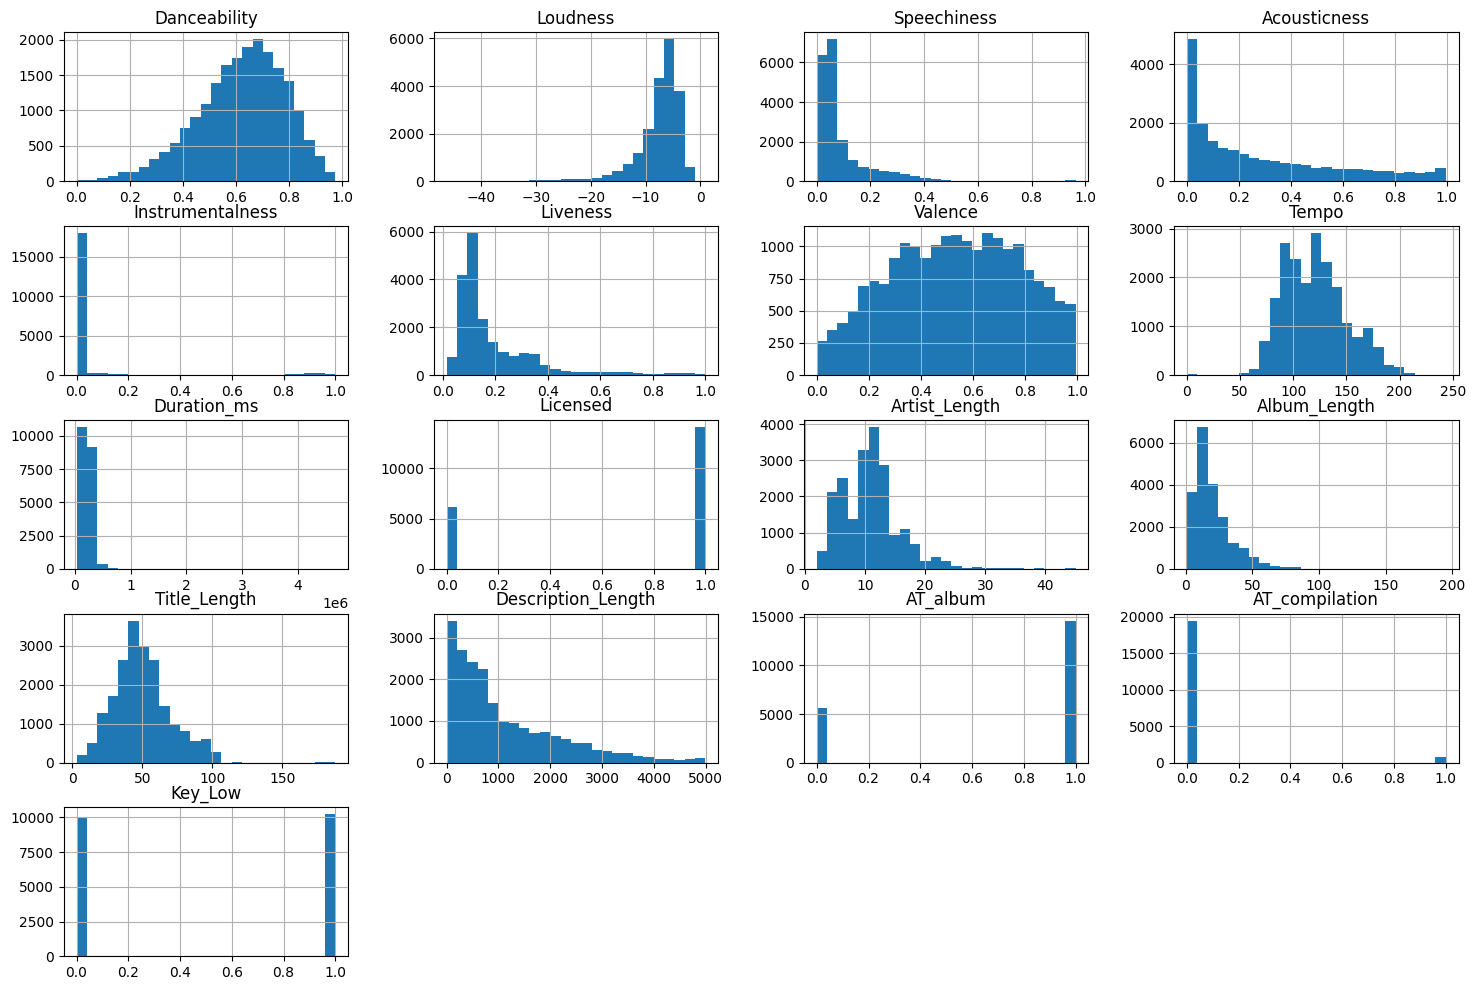

In [15]:
print(df.drop(["Views"], axis = 1).hist(bins = 25, figsize=(18, 12)))

In [16]:
df["new_Duration_ms"]=df["Duration_ms"]/(1000*60)
df["new_Duration_ms"]=np.where(df["new_Duration_ms"] < 7, df['new_Duration_ms'], 7)
df["Title_Length"]=np.where(df["Title_Length"] < 100, df['Title_Length'], 100)
df["Artist_Length"]=np.where(df["Artist_Length"] < 25, df['Artist_Length'], 25)
df["new_Instrumentalness"]=np.where(df['Instrumentalness'] < 0.5, 0, 1)
df["Speechiness"]=np.where(df["Speechiness"] < 0.5, df['Speechiness'], 0.5)
df["Danceability"]=np.where(df["Danceability"] > 0.1, df['Danceability'], 0.1)
df["Loudness"]=np.where(df["Loudness"] > -20, df['Loudness'],-20)

[[<Axes: title={'center': 'Danceability'}>
  <Axes: title={'center': 'Loudness'}>
  <Axes: title={'center': 'Speechiness'}>
  <Axes: title={'center': 'Acousticness'}>]
 [<Axes: title={'center': 'Instrumentalness'}>
  <Axes: title={'center': 'Liveness'}>
  <Axes: title={'center': 'Valence'}> <Axes: title={'center': 'Tempo'}>]
 [<Axes: title={'center': 'Duration_ms'}>
  <Axes: title={'center': 'Licensed'}>
  <Axes: title={'center': 'Artist_Length'}>
  <Axes: title={'center': 'Album_Length'}>]
 [<Axes: title={'center': 'Title_Length'}>
  <Axes: title={'center': 'Description_Length'}>
  <Axes: title={'center': 'AT_album'}>
  <Axes: title={'center': 'AT_compilation'}>]
 [<Axes: title={'center': 'Key_Low'}>
  <Axes: title={'center': 'new_Duration_ms'}>
  <Axes: title={'center': 'new_Instrumentalness'}> <Axes: >]]


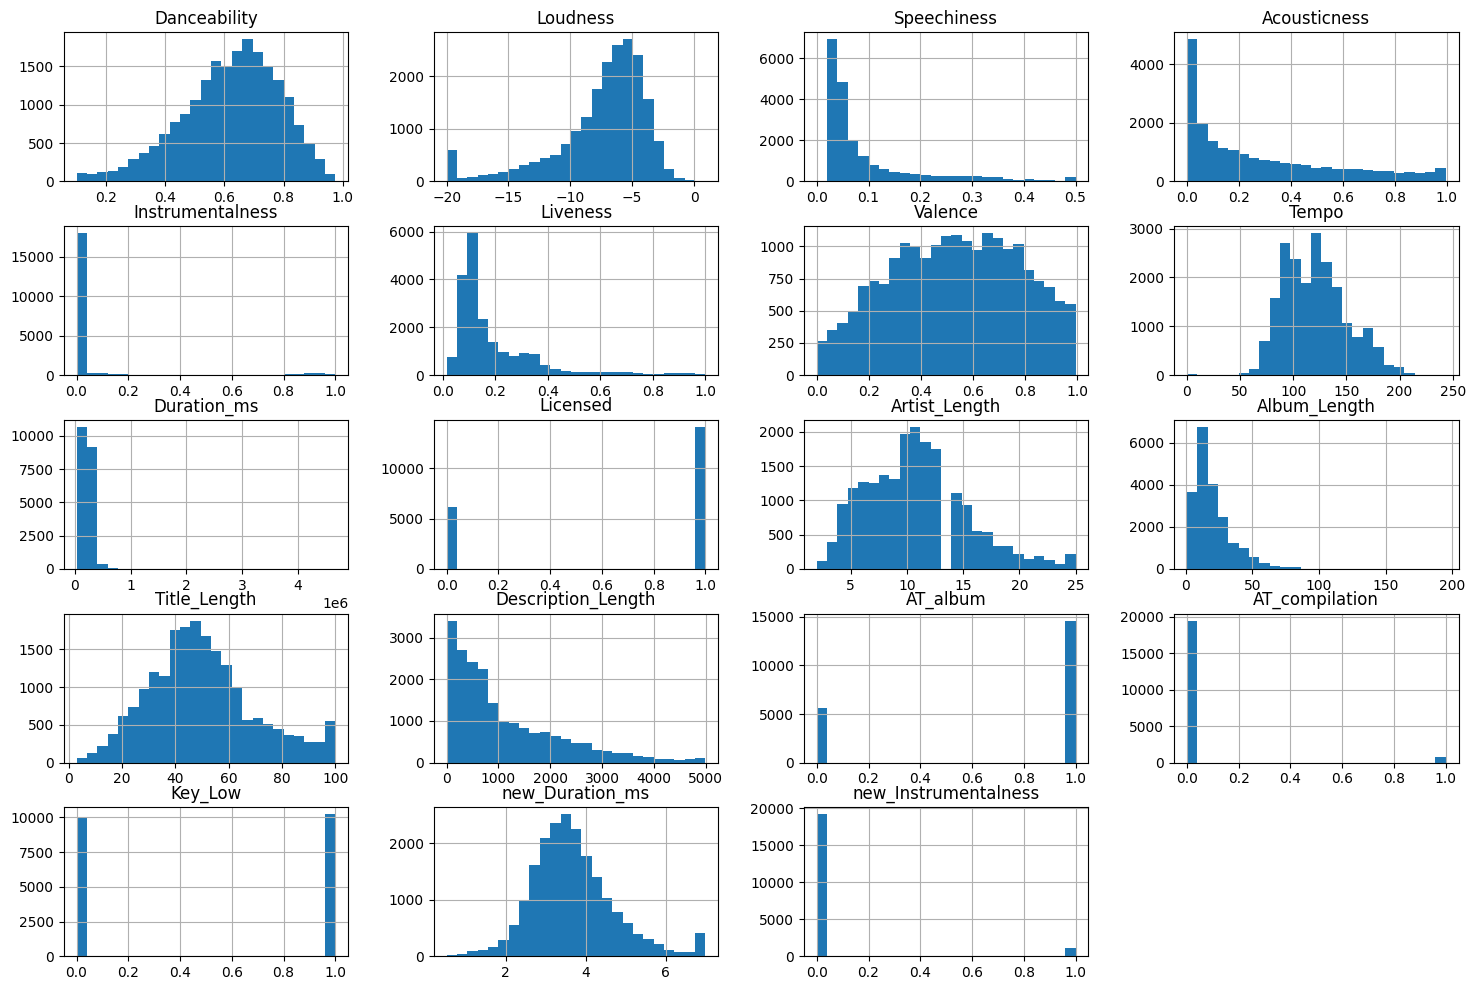

In [17]:
print(df.drop(["Views"], axis = 1).hist(bins = 25, figsize=(18, 12)))

In [18]:
df["Speechiness"]=df["Speechiness"].apply(lambda x: np.log((x+0.01)/(1-x+0.01)))
df["Description_Length"]=df["Description_Length"].apply(lambda x: np.log(x+1))
df["Acousticness"]=df["Acousticness"].apply(lambda x: np.log((x+0.01)/(1-x+0.01)))
df["Liveness"]=df["Liveness"].apply(lambda x: np.log((x+0.01)/(1-x+0.01)))
df["Album_Length"]=df["Album_Length"].apply(lambda x: np.log(x+1))
df["Tempo"]=np.where(df["Tempo"] > 50, df['Tempo'], 50)
df["Tempo"]=np.where(df["Tempo"] <200, df['Tempo'], 200)
df=df.drop(["Duration_ms","Instrumentalness"],axis=1)


[[<Axes: title={'center': 'Danceability'}>
  <Axes: title={'center': 'Loudness'}>
  <Axes: title={'center': 'Speechiness'}>
  <Axes: title={'center': 'Acousticness'}>]
 [<Axes: title={'center': 'Liveness'}>
  <Axes: title={'center': 'Valence'}> <Axes: title={'center': 'Tempo'}>
  <Axes: title={'center': 'Licensed'}>]
 [<Axes: title={'center': 'Artist_Length'}>
  <Axes: title={'center': 'Album_Length'}>
  <Axes: title={'center': 'Title_Length'}>
  <Axes: title={'center': 'Description_Length'}>]
 [<Axes: title={'center': 'AT_album'}>
  <Axes: title={'center': 'AT_compilation'}>
  <Axes: title={'center': 'Key_Low'}>
  <Axes: title={'center': 'new_Duration_ms'}>]
 [<Axes: title={'center': 'new_Instrumentalness'}> <Axes: > <Axes: >
  <Axes: >]]


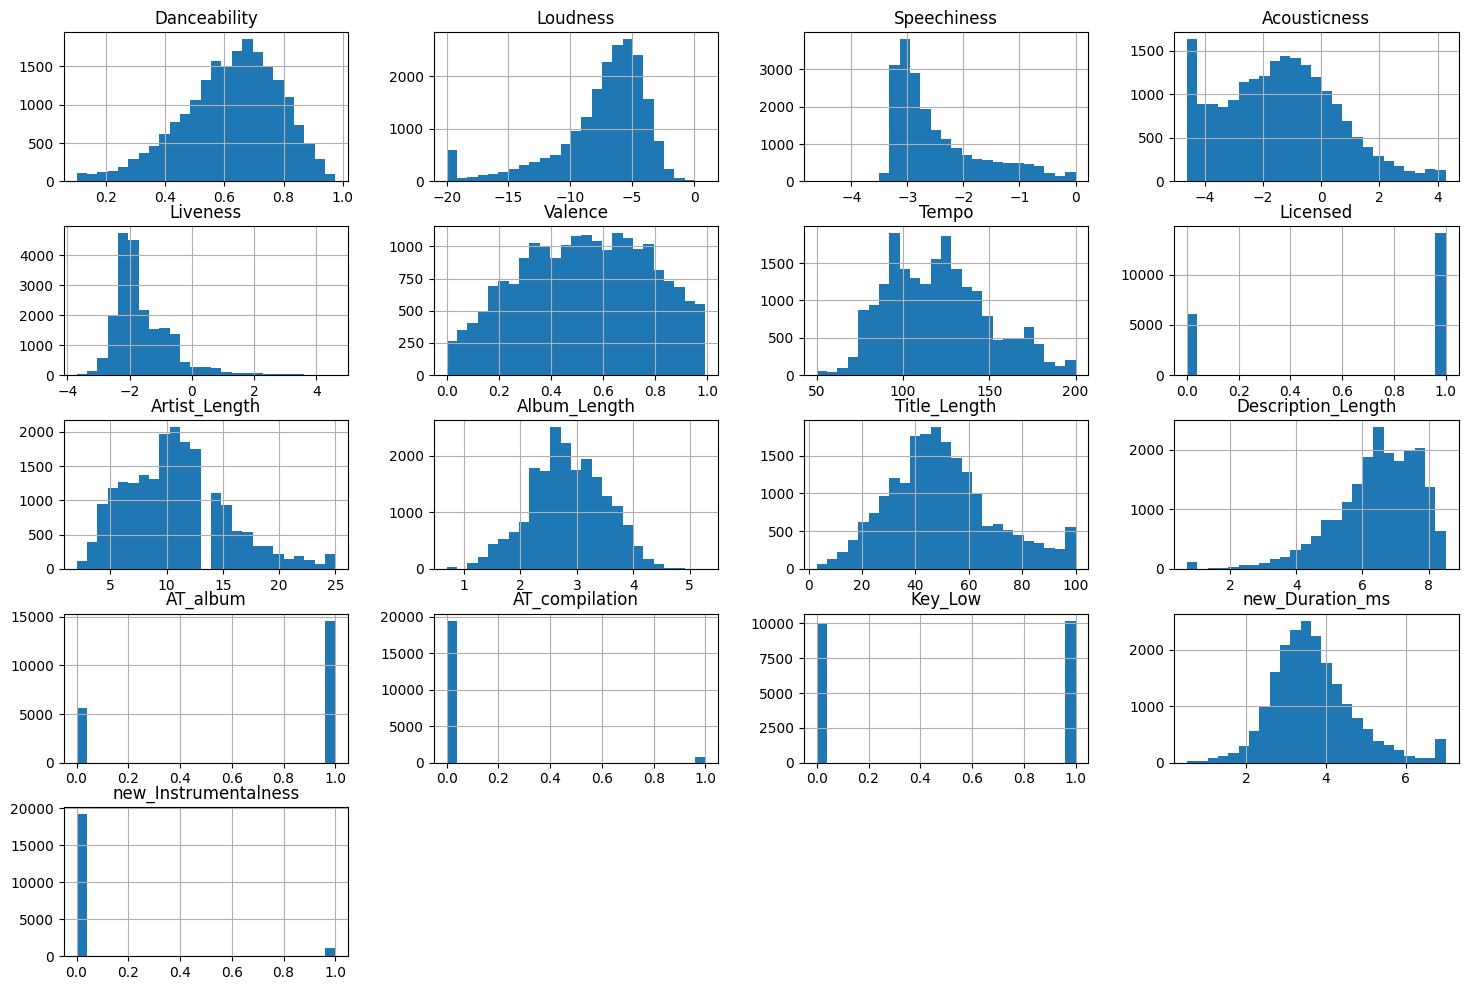

In [19]:
print(df.drop(["Views"], axis = 1).hist(bins = 25, figsize=(18, 12)))

In [20]:
df_X=df.drop("Views",axis=1)
df_Y=df["Views"]
X_train, X_valid, y_train, y_valid = train_test_split(df_X,df_Y,test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2, random_state=42)

In [21]:
scaler=StandardScaler()

In [22]:
df.columns

Index(['Danceability', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Valence', 'Tempo', 'Views', 'Licensed', 'Artist_Length',
       'Album_Length', 'Title_Length', 'Description_Length', 'AT_album',
       'AT_compilation', 'Key_Low', 'new_Duration_ms', 'new_Instrumentalness'],
      dtype='object')

In [23]:
columns_to_transforms = ['Danceability', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness','Valence', 
                         'Tempo','Artist_Length','Album_Length', 'Title_Length', 'Description_Length',
                         'new_Duration_ms']

In [24]:
scaler.fit(X_train[columns_to_transforms])
X_train[columns_to_transforms] = scaler.transform(X_train[columns_to_transforms])
X_test[columns_to_transforms] = scaler.transform(X_test[columns_to_transforms])
X_valid[columns_to_transforms] = scaler.transform(X_valid[columns_to_transforms])

[[<Axes: title={'center': 'Danceability'}>
  <Axes: title={'center': 'Loudness'}>
  <Axes: title={'center': 'Speechiness'}>
  <Axes: title={'center': 'Acousticness'}>]
 [<Axes: title={'center': 'Liveness'}>
  <Axes: title={'center': 'Valence'}> <Axes: title={'center': 'Tempo'}>
  <Axes: title={'center': 'Licensed'}>]
 [<Axes: title={'center': 'Artist_Length'}>
  <Axes: title={'center': 'Album_Length'}>
  <Axes: title={'center': 'Title_Length'}>
  <Axes: title={'center': 'Description_Length'}>]
 [<Axes: title={'center': 'AT_album'}>
  <Axes: title={'center': 'AT_compilation'}>
  <Axes: title={'center': 'Key_Low'}>
  <Axes: title={'center': 'new_Duration_ms'}>]
 [<Axes: title={'center': 'new_Instrumentalness'}> <Axes: > <Axes: >
  <Axes: >]]


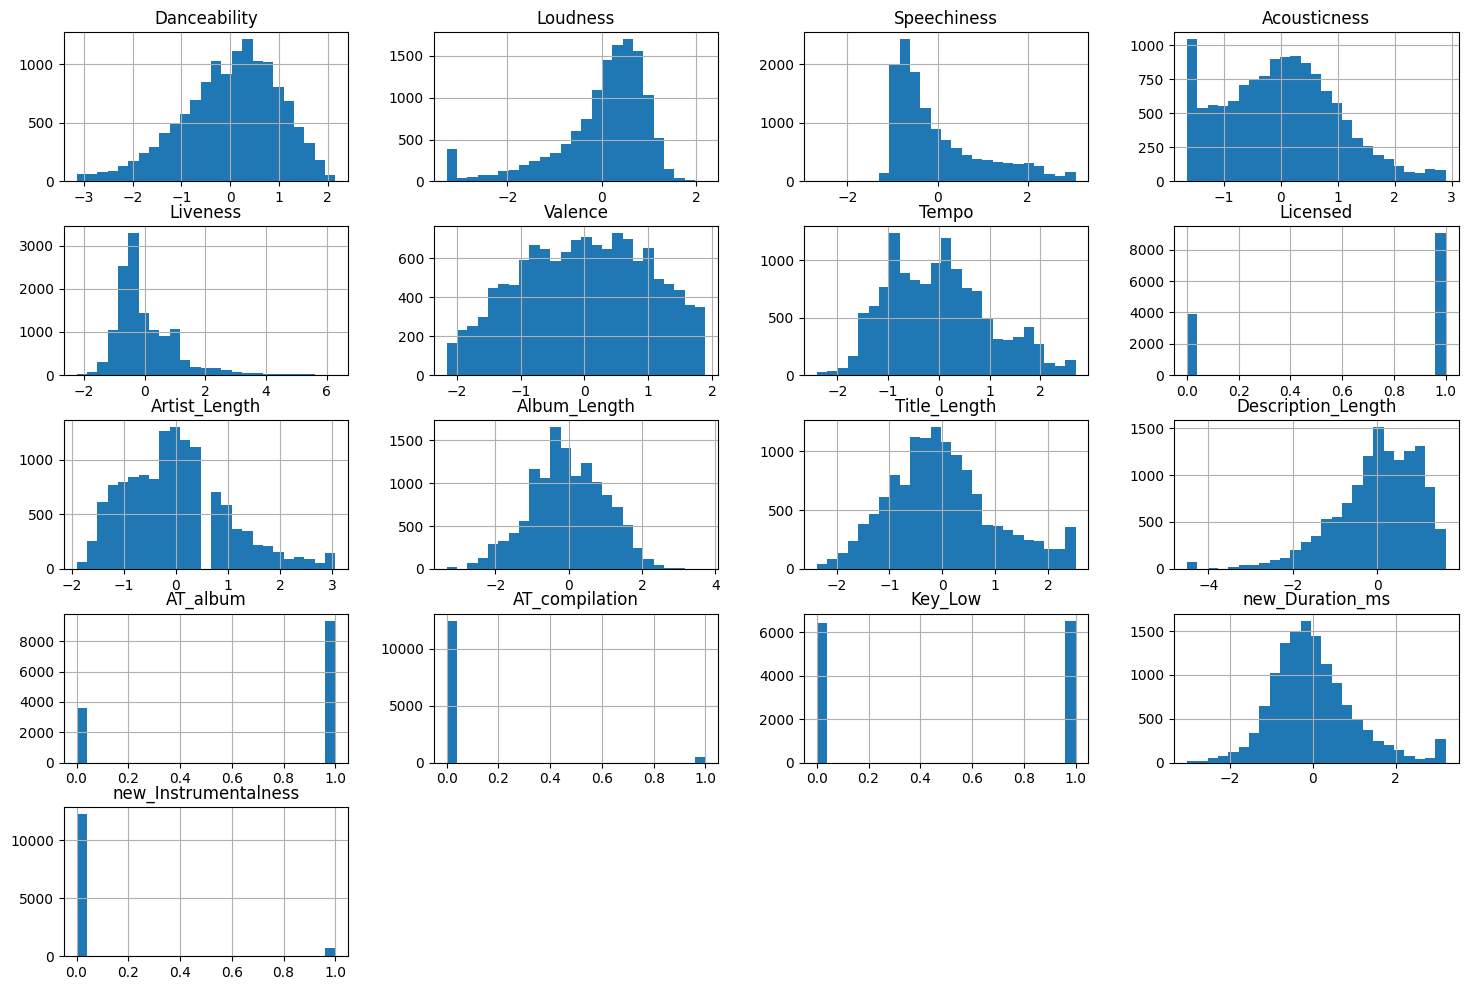

In [25]:
print(X_train.hist(bins = 25, figsize=(18, 12)))

In [26]:

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
selector = SelectKBest(score_func=f_regression, k=5)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [27]:
temp = pd.DataFrame({'Feature': X_test.columns,
              'Score': selector.pvalues_})
temp.sort_values(by='Score', ascending=True)


,Feature,Score
7,Licensed,3.201769e-69
1,Loudness,4.278507e-49
11,Description_Length,8.960461e-39
0,Danceability,3.246897e-27
16,new_Instrumentalness,1.538089e-16
10,Title_Length,5.329813e-14
15,new_Duration_ms,4.490929e-11
3,Acousticness,1.567705e-10
5,Valence,1.162887e-06
8,Artist_Length,6.357947e-05


In [28]:
X_train["Views"] = y_train
X_train.to_csv(r".\data\Train.csv",index=False)
X_test["Views"] = y_test
X_test.to_csv(r".\data\Test.csv",index=False)
X_valid["Views"] = y_valid
X_valid.to_csv(r".\data\Valid.csv",index=False)